<a href="https://colab.research.google.com/github/sivaroot/ProjectCPE-V.2/blob/master/Test/UnitTest_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [6]:
input_img = cv2.imread("75yo_male.jpg",0)
rgb_img = cv2.imread("75yo_male.jpg")
blur_img = cv2.GaussianBlur(input_img,(5,5),0)
data = blur_img.ravel()
newdata  = np.expand_dims(data,1)
print(newdata.shape)

(262144, 1)


**GMM Segmentation**

In [0]:
gmm = GaussianMixture(n_components = 4)
gmm = gmm.fit(newdata)


select_g = np.argmax(gmm.means_.ravel()) # find index of max value of mean (skull)
cluster = gmm.predict(newdata)
#cluster[cluster != select_g] = (1 if select_g == 0 else 0)   # auto labeling 

cluster[cluster == select_g] = 5
cluster[cluster != 5] = 0
cluster[cluster == 5] = 1
cluster = cluster.reshape(512, 512)
outImg_select = input_img*cluster


**K-Mean Segmentation**

In [0]:
img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
img = cv2.GaussianBlur(img,(5,5),0)
Z = np.float32(img.reshape((-1,3)))

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

ret,label,center=cv2.kmeans(Z,4,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)
cenTranspose = center.transpose()[0]
indexMax = np.argmax(cenTranspose)
indexMin = np.argmin(cenTranspose)
       
labelf = label.flatten()
labelf[labelf != indexMax] = indexMin

res = center[labelf]
k_img = res.reshape(img.shape)



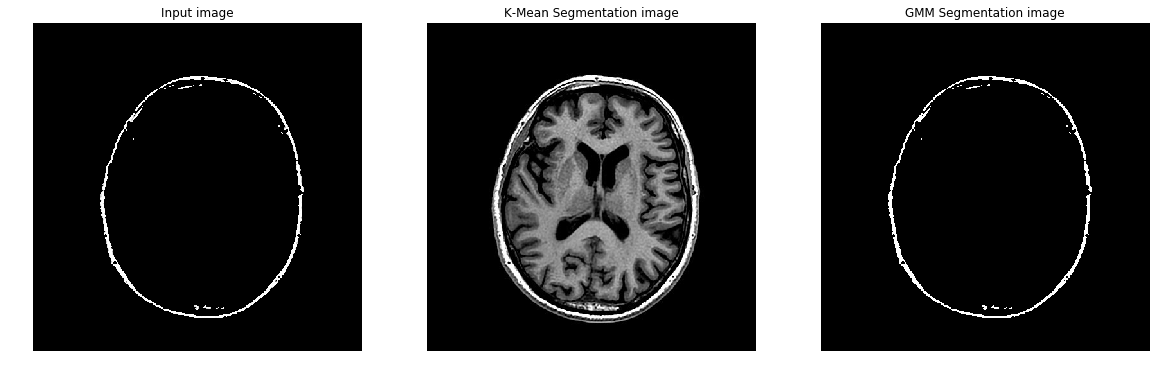

In [36]:
fig = plt.figure(figsize=(20,20))

col1 = fig.add_subplot(131)  # 1 row 3 col  --> position 1 
col2 = fig.add_subplot(132)  # 1 row 3 col  --> position 2 
col3 = fig.add_subplot(133)  # 1 row 3 col  --> position 3

col1.imshow(outImg_select ,cmap="gray")
col1.set_title("Input image")
col1.axis('off')

col2.imshow(rgb_img)
col2.set_title("K-Mean Segmentation image")
col2.axis('off')

col3.imshow(cluster,cmap="gray")
col3.set_title("GMM Segmentation image")
col3.axis('off')


fig.show()